# Basic Analysis of the data

In [145]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [146]:
#Setting full view of the data
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [147]:
#Loading the data
data = pd.read_csv('C:/Users/bhavi/OneDrive/Desktop/Data/Cluster_Data.csv')

In [148]:
#View the dataset
data

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


# Creating X data with Annual Income and Spending Score

In [149]:
#Creating data X with variable Annual Income and Spending Scores
X = data.iloc[:,[1,2]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# Feature Scaling of the X Data

In [150]:
#Feature Scaling of the X Data
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

# Finding Optimal Number of Epsilon for Density Base Cluster

In [151]:
#Creating Nearest Neighbor list with respect to their index number
nbrs = NearestNeighbors(n_neighbors=3).fit(X)
distances, indices = nbrs.kneighbors(X)

In [152]:
#Checking distance (1st Nearest Distance and 2nd Nearest Distance)
distances

array([[0.        , 0.08564307, 0.27669913],
       [0.        , 0.15990848, 0.20603662],
       [0.        , 0.07633886, 0.16332841],
       [0.        , 0.0544428 , 0.15267772],
       [0.        , 0.08564307, 0.24695814],
       [0.        , 0.0544428 , 0.12091014],
       [0.        , 0.07633886, 0.12255989],
       [0.        , 0.19782504, 0.24604156],
       [0.        , 0.12255989, 0.16332841],
       [0.        , 0.17303595, 0.19475561],
       [0.        , 0.0544428 , 0.0544428 ],
       [0.        , 0.15753602, 0.19782504],
       [0.        , 0.0544428 , 0.07764312],
       [0.        , 0.07764312, 0.12091014],
       [0.        , 0.0544428 , 0.07764312],
       [0.        , 0.07764312, 0.16332841],
       [0.        , 0.11450829, 0.24511979],
       [0.        , 0.24511979, 0.29489102],
       [0.        , 0.22357696, 0.236036  ],
       [0.        , 0.15753602, 0.24604156],
       [0.        , 0.11450829, 0.19202736],
       [0.        , 0.03816943, 0.19475561],
       [0.

In [153]:
#Checking Index
indices

array([[  0,   4,  16],
       [  1,   3,  15],
       [  2,   6,   8],
       [  3,   5,  13],
       [  4,   0,  16],
       [  5,   3,  13],
       [  6,   2,   8],
       [  7,  11,  19],
       [  8,   6,   2],
       [  9,   5,  21],
       [ 10,  14,  12],
       [ 11,  19,   7],
       [ 12,  10,  14],
       [ 13,  15,   5],
       [ 14,  10,  12],
       [ 15,  13,   5],
       [ 16,  20,  18],
       [ 17,   9,  21],
       [ 18,  26,  20],
       [ 19,  11,   7],
       [ 20,  16,  26],
       [ 21,  23,   9],
       [ 22,  30,   8],
       [ 23,  21,  31],
       [ 24,  34,  36],
       [ 25,  35,  29],
       [ 26,  28,  20],
       [ 27,  17,  43],
       [ 28,  26,  18],
       [ 29,  25,  33],
       [ 30,  32,  22],
       [ 31,  37,  23],
       [ 32,  30,  22],
       [ 33,  41,  29],
       [ 34,  36,  24],
       [ 35,  25,  29],
       [ 36,  34,  24],
       [ 37,  39,  31],
       [ 38,  44,  40],
       [ 39,  37,  31],
       [ 40,  42,  44],
       [ 41,  33

In [154]:
#Sorting the 2nd nearest distance values in descending order
distanceDec = sorted(distances[:,2], reverse=True)
distanceDec

[0.6672027095648378,
 0.6535090609453799,
 0.587305862316214,
 0.5725414375765854,
 0.5718364291710365,
 0.5462249937357125,
 0.5370407021791156,
 0.5370407021791156,
 0.5191078371534682,
 0.5174618169414061,
 0.4977189098412889,
 0.4658587285383729,
 0.41986372088949575,
 0.3945721361033899,
 0.35538311280453044,
 0.3514727656386843,
 0.34607189143564526,
 0.30781334322477255,
 0.294891019085977,
 0.2822697052839207,
 0.27850776274931804,
 0.27823877362072436,
 0.27669913056608536,
 0.27441842239757613,
 0.27441842239757613,
 0.27441842239757613,
 0.25955391857673393,
 0.2569292000210834,
 0.2569292000210834,
 0.24695814336595695,
 0.24695814336595695,
 0.24695814336595676,
 0.24604156213887768,
 0.24604156213887768,
 0.24604156213887768,
 0.24511978710835072,
 0.2418202761206728,
 0.2418202761206728,
 0.23603600162294383,
 0.2360360016229438,
 0.23603600162294375,
 0.2360360016229437,
 0.2360360016229437,
 0.2360360016229437,
 0.2360360016229437,
 0.23292936426918653,
 0.232929364269

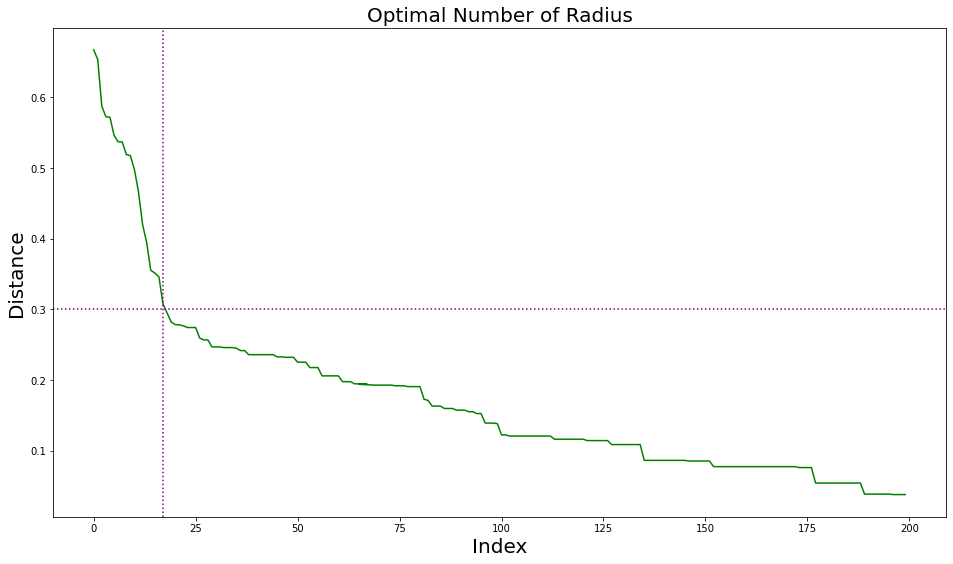

In [155]:
#Ploting 2nd nearest distance with index
plt.figure(figsize=(16,9));
plt.plot(indices[:,0],distanceDec, c = 'g');
plt.xlabel('Index', fontsize = 20);
plt.ylabel('Distance', fontsize = 20);
plt.title('Optimal Number of Radius', fontsize = 20);
plt.axhline( y = 0.3, c = 'purple', linestyle = ':');
plt.axvline(x = 17, c = 'purple', linestyle = ':')
plt.show();

# Implementing DBSCAN

In [156]:
#Implementing DBSCAN
db = DBSCAN(eps = 0.3, min_samples=5).fit(X)
#Taking radius 0.3 as per the graph
#Minimum point should be cover within the radius of core point is 5

In [157]:
#Extracting cluster labels
db.labels_

array([ 2,  0,  1,  0,  2,  0,  1, -1,  1,  0, -1, -1, -1,  0,  1,  0,  2,
        0,  2, -1,  2,  0,  1,  0, -1, -1,  2, -1,  2, -1, -1,  0, -1, -1,
       -1, -1, -1,  0, -1,  0,  3, -1,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  4,  3,  4,  3,  4,  5,  4,  5,  4,  3,  4,  5,  4,
        5,  4,  5,  4,  5,  4,  3,  4,  5,  4,  3,  4,  5,  4,  5,  4,  5,
        4,  5,  4,  5,  4,  5,  4,  3,  4,  5,  4,  6,  4,  6,  4,  6, -1,
        6,  4,  6,  4,  6,  4,  6,  4,  6,  4, -1,  4,  6,  4, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [158]:
#Extracting core points labels index numbers
db.core_sample_indices_

array([  1,   3,   5,   6,   9,  13,  15,  16,  18,  20,  21,  23,  26,
        31,  40,  42,  43,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
       135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
       149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 161, 163, 165,
       166, 170, 172, 173, 174, 176, 178, 179], dtype=int64)

# Wroking for visualization of the clusters

In [159]:
#Creating zeros arrays in boolean equivalent to core points of the labels
core_samples_mask = np.zeros_like(db.labels_, dtype = bool) 
core_samples_mask

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [160]:
#Changing core points values as true in core sample mask
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([False,  True, False,  True, False,  True,  True, False, False,
        True, False, False, False,  True, False,  True,  True, False,
        True, False,  True,  True, False,  True, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True, False,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,

In [162]:
#Labels stored in lables
labels = db.labels_
labels

array([ 2,  0,  1,  0,  2,  0,  1, -1,  1,  0, -1, -1, -1,  0,  1,  0,  2,
        0,  2, -1,  2,  0,  1,  0, -1, -1,  2, -1,  2, -1, -1,  0, -1, -1,
       -1, -1, -1,  0, -1,  0,  3, -1,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  4,  3,  4,  3,  4,  5,  4,  5,  4,  3,  4,  5,  4,
        5,  4,  5,  4,  5,  4,  3,  4,  5,  4,  3,  4,  5,  4,  5,  4,  5,
        4,  5,  4,  5,  4,  5,  4,  3,  4,  5,  4,  6,  4,  6,  4,  6, -1,
        6,  4,  6,  4,  6,  4,  6,  4,  6,  4, -1,  4,  6,  4, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [163]:
#Computing number of clusters formed in labels
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

7

In [167]:
#Counting how many -1 in the labels for clustering
n_noise_ = list(labels).count(-1)
n_noise_

35

In [172]:
#Printing estimated number of cluster and noise
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)  

Estimated number of clusters: 7
Estimated number of noise points: 35


# Visualization of Clusters

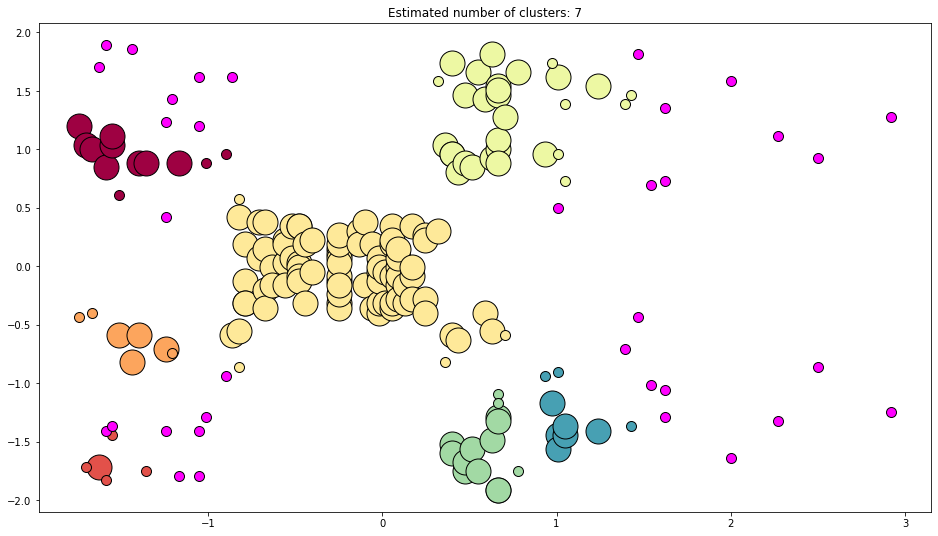

In [173]:
#Visualization of Clusters
unique_labels = set(labels) #Getting clusters labels {-1, 0, 1, 2, 3, 4, 5, 6}
plt.figure(figsize = (16,9)) #Fixing size of the plot
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))] 
#Creating 8 spectral numerical codes for colors from CMYK - cyan, magenta, yellow, and key

for k, col in zip(unique_labels, colors):
  if k == -1:
    col = [1, 0, 1, 1]
  class_member_mask = (labels == k) #It is stating that mark as True for -1 and rest of are False in labels
  xy = X[class_member_mask & core_samples_mask] #
  plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=25)
  xy = X[class_member_mask & ~core_samples_mask]
  plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),markeredgecolor='k', markersize=10)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()
         

# Visualization Through Seaborn

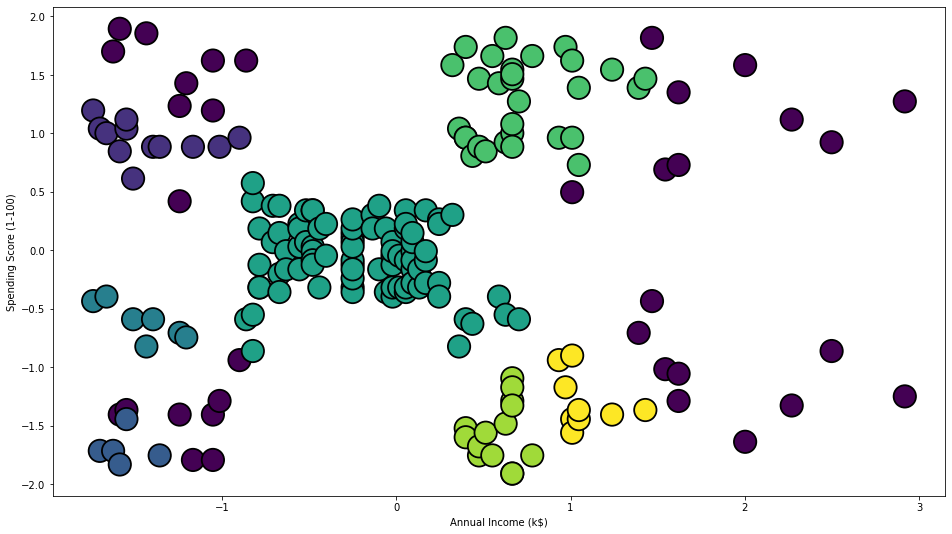

In [30]:
import seaborn as sns
plt.figure(figsize=(16,9))
ax = sns.scatterplot(x = data1['Annual Income (k$)'],
               y = data1['Spending Score (1-100)'],
               c = data1['Clusters'],
               s = 500,
               edgecolor = 'k');
#for c in ax.collections:
    #for of in c.get_offsets():
        #ax.annotate(labels,of)

In [178]:
#Creating data
X1 = pd.DataFrame(X[:,[0]], columns=['Annual Income (k$)'])
X1
X2 = pd.DataFrame(X[:,[1]], columns=['Spending Score (1-100)'])
X2
X3 = pd.DataFrame(labels, columns= ['Clusters'])
X3
data1 = pd.concat([X1,X2,X3], axis=1)
data1

,Annual Income (k$),Spending Score (1-100),Clusters
0,-1.738999,-0.434801,2
1,-1.738999,1.195704,0
2,-1.700830,-1.715913,1
3,-1.700830,1.040418,0
4,-1.662660,-0.395980,2
5,-1.662660,1.001596,0
6,-1.624491,-1.715913,1
7,-1.624491,1.700384,-1
8,-1.586321,-1.832378,1
9,-1.586321,0.846310,0


In [179]:
def Diff(li1, li2):
    return (list(list(set(li1)-set(li2)) + list(set(li2)-set(li1))))

diff1 = Diff(index_all, index_core_point)
diff2 = Diff(diff1, index_outlier)
diff2

[0,
 2,
 4,
 8,
 14,
 17,
 148,
 22,
 152,
 28,
 160,
 162,
 164,
 37,
 39,
 167,
 168,
 171,
 44,
 45,
 175,
 177,
 181,
 182,
 183,
 123,
 124]

In [180]:
#Splitting data cluster wise
outliers = data1[data1['Clusters']==-1]
core_point = data1.iloc[[1,3,5,6,9,13,15,16,18,20,21,23,26,31,40,42,43,46
,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82
,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118
,119,120,121,122,125,126,127,128,129,130,131,132,133,134,135,136,137,138
,139,140,141,142,143,144,145,146,147,149,150,151,153,154,155,156,157,158
,159,161,163,165,166,170,172,173,174,176,178,179]]
member_point = data1.iloc[[0,2,4,8,14,17,148,22,152,28,160,162,164,37,39,167,168,171,44,45,175,177,181,182,183,123,124]]

In [181]:
outliers['Status'] = 'Outlier'
core_point['Status'] = 'Core Point'
member_point['Status'] = 'Member Point'

<ipython-input-181-68b2c496bc00>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['Status'] = 'Outlier'
<ipython-input-181-68b2c496bc00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  core_point['Status'] = 'Core Point'
<ipython-input-181-68b2c496bc00>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [182]:
data2 = pd.concat([outliers, core_point, member_point])
data2.sort_index(axis = 0, inplace=True)
data2

,Annual Income (k$),Spending Score (1-100),Clusters,Status
0,-1.738999,-0.434801,2,Member Point
1,-1.738999,1.195704,0,Core Point
2,-1.700830,-1.715913,1,Member Point
3,-1.700830,1.040418,0,Core Point
4,-1.662660,-0.395980,2,Member Point
5,-1.662660,1.001596,0,Core Point
6,-1.624491,-1.715913,1,Core Point
7,-1.624491,1.700384,-1,Outlier
8,-1.586321,-1.832378,1,Member Point
9,-1.586321,0.846310,0,Core Point


In [190]:
index_core_point = db.core_sample_indices_

In [192]:
index_all = data1.index.values
index_outlier = data1['Clusters'][data1['Clusters']==-1].index.values
index_core_point = db.core_sample_indices_
index_member_point = [0,2,4,8,14,17,148,22,152,28,160,162,164,37,39,167,168,171,44,45,175,177,181,182,183,123,124]
print(index_all)
print(index_outlier)
print(index_core_point)
print(index_member_point)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199]
[  7  10  11  12  19  24  25  27  29  30  32  33  34  35  36  38  41 169
 180 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199]
[  1   3   5   6   9  13  15  16  18  20  21

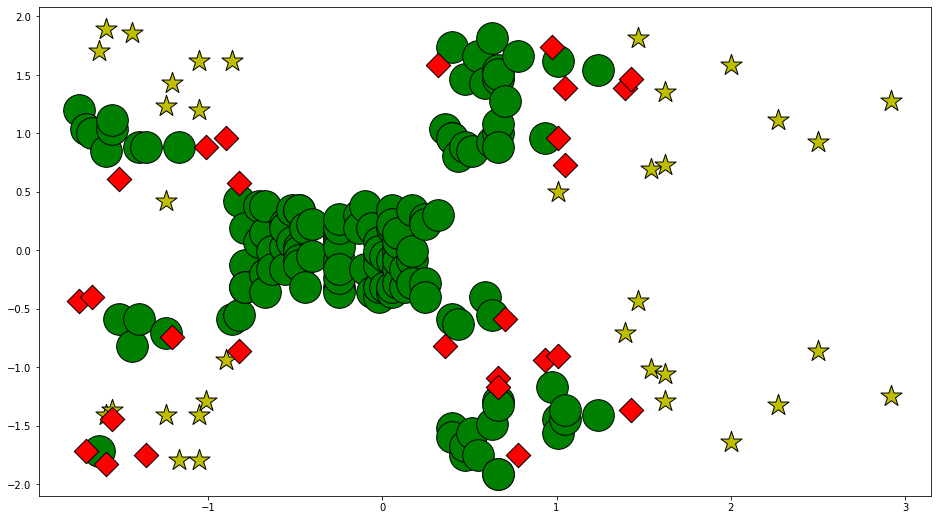

In [135]:
plt.figure(figsize=(16,9))
plt.scatter(x = outliers['Annual Income (k$)'],
                     y = outliers['Spending Score (1-100)'],
                     s = 500,
                     edgecolor = 'k',
                     marker='*',
                    c = 'y');
plt.scatter(x = core_point['Annual Income (k$)'],
                     y = core_point['Spending Score (1-100)'],
                     s = 1000,
                     edgecolor = 'k',
                     marker='o',
                    c = 'g');
plt.scatter(x = member_point['Annual Income (k$)'],
                     y = member_point['Spending Score (1-100)'],
                     s = 300,
                     edgecolor = 'k',
                     marker='D',
                    c = 'r');

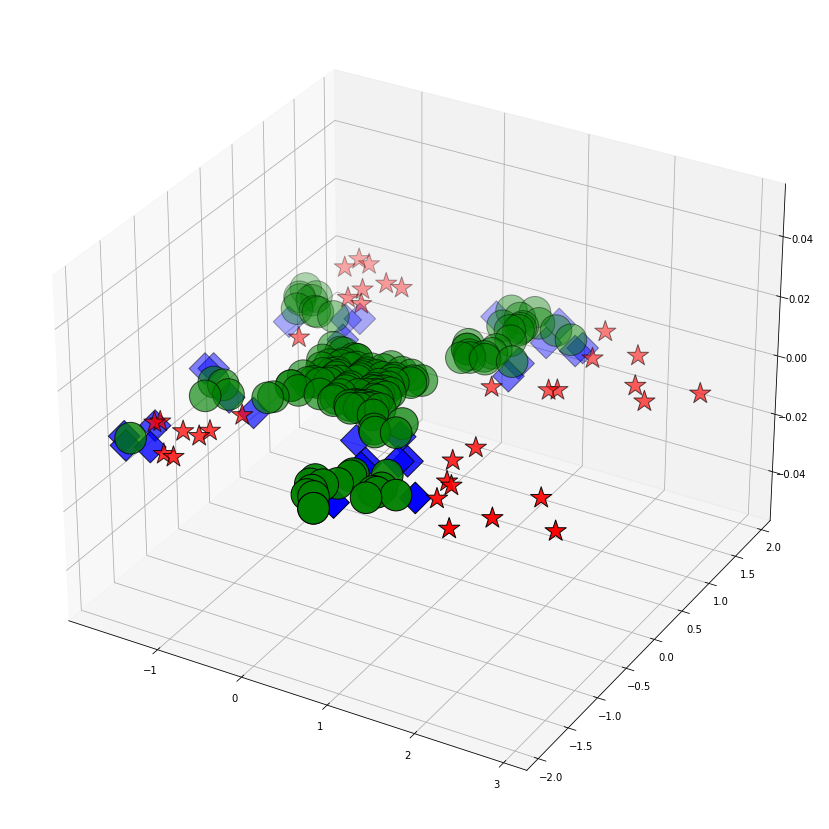

In [144]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(30,15))
ax = fig.add_subplot(111, projection = '3d')

x = outliers['Annual Income (k$)']
y = outliers['Spending Score (1-100)']
x1 = core_point['Annual Income (k$)']
y1 = core_point['Spending Score (1-100)']
x2 = member_point['Annual Income (k$)']
y2 = member_point['Spending Score (1-100)']

ax.scatter(x,y,c = 'r', marker= '*',s = 500, edgecolor = 'k')
ax.scatter(x1,y1,c = 'g', marker= 'o', s = 1000, edgecolor = 'k')
ax.scatter(x2,y2,c = 'b', marker= 'D', s = 500, edgecolor = 'k')

plt.show()